### STEP 1: Load and Explore Brent Oil Price Data

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/TadeleBizuye/OneDrive - esxethiopia/Desktop/AI/BrentOilPrices.csv")

# Inspect the first few rows
print(df.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


C:\Users\TadeleBizuye\AppData\Local\Temp\ipykernel_7216\983513984.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


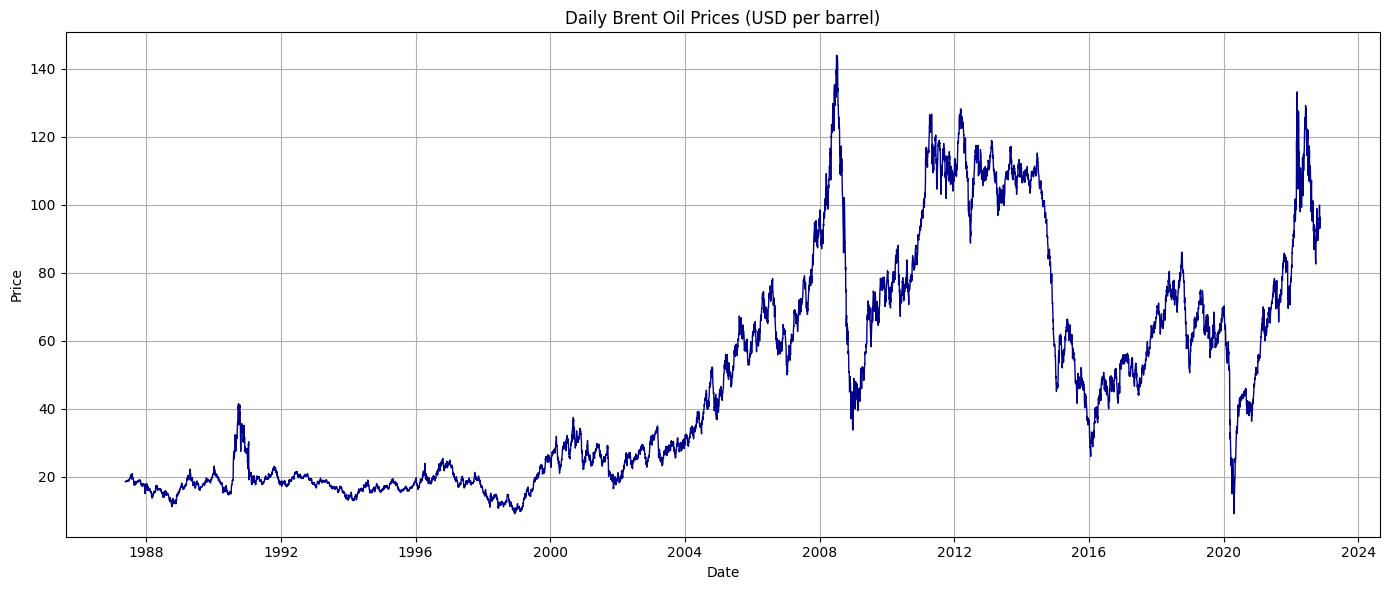

In [8]:
# Convert 'Date' column to datetime with flexible parsing
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows where date parsing failed
df = df.dropna(subset=['Date'])

# Sort by Date
df = df.sort_values('Date').reset_index(drop=True)

# Plot the Brent oil prices
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Price'], color='darkblue', linewidth=1)
plt.title('Daily Brent Oil Prices (USD per barrel)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

### STEP 2: Calculate and Plot Log Returns

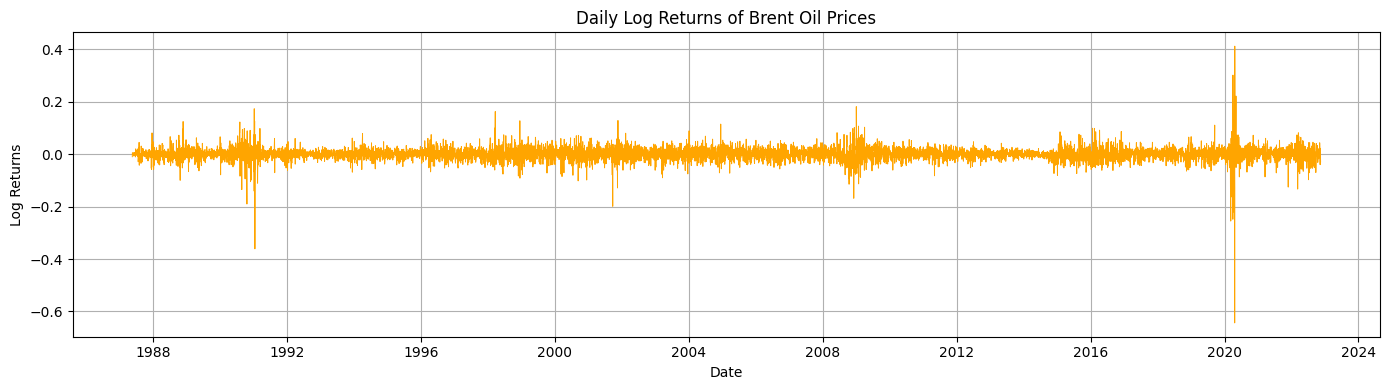

In [9]:
import numpy as np

# Step 2.1: Calculate log returns
df['Log_Returns'] = np.log(df['Price'] / df['Price'].shift(1))

# Step 2.2: Drop missing values due to shift
df = df.dropna()

# Step 2.3: Plot log returns
plt.figure(figsize=(14, 4))
plt.plot(df['Date'], df['Log_Returns'], color='orange', linewidth=0.7)
plt.title('Daily Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

### STEP 3: Bayesian Change Point Detection using PyMC3

In [10]:
import pymc3 as pm
import theano.tensor as tt

# Step 3.1: Select log return values as a NumPy array
log_returns = df['Log_Returns'].values
n = len(log_returns)

# Step 3.2: Build the Bayesian model
with pm.Model() as model:
    # Prior for the change point location (tau)
    tau = pm.DiscreteUniform('tau', lower=0, upper=n - 1)

    # Priors for the mean before and after the change
    mu1 = pm.Normal('mu1', mu=0, sigma=1)
    mu2 = pm.Normal('mu2', mu=0, sigma=1)

    # Priors for standard deviation (volatility)
    sigma1 = pm.HalfNormal('sigma1', sigma=1)
    sigma2 = pm.HalfNormal('sigma2', sigma=1)

    # Define the mean and sigma across time with switch
    mu = tt.switch(tau >= np.arange(n), mu1, mu2)
    sigma = tt.switch(tau >= np.arange(n), sigma1, sigma2)

    # Likelihood
    obs = pm.Normal('obs', mu=mu, sigma=sigma, observed=log_returns)

    # Step 3.3: Run the sampler
    trace = pm.sample(2000, tune=1000, return_inferencedata=False, cores=1)


ModuleNotFoundError: No module named 'pymc3'